# Case Study 1 : How Does a Bike-Share Navigate Speedy Success?

#### Business Question : 
How do annual members and casual riders use Cyclistic bikes differently?

Following are the deliverables that need to be produced:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

## <u>ASK:</u>

Guiding questions
1. What is the problem you are trying to solve?
2. How can your insights drive business decisions?

### <u>I) Clear Statement of the Business task</u>
Annual members and casual members are the two main catoguries mentioned in the buisiness case. As the company is not looking for adding new coustomers but only for converting the current casual riders to annual members. We can simply consider that the people who are actually opted for a annual membership are the one who uses bicycles on a daily basis whereas, the casual riders uses the bicycle occasionally.

<b>1) What is the problem you are trying to solve?</b>

The business task is all about bicycle membership and "How do annual members and casual riders use Cyclistic bikes differently?". Casual riders are the on one with no annual membership.

<b>2) How can your insights drive business decisions?</b>

My insights gives a clear picture of why casual riders were not opting for annual membership and also what stoppping them to pick annual membership over casual membership. Also, how often the casual riders are using bicycles and what are the ways that we can make a casual rider take an annual membership.

# <u>Prepare:</u>

Guiding questions:
1. Where is your data located?
2. How is the data organized?
3. Are there issues with bias or credibility in this data? Does your data ROCCC?
4. How are you addressing licensing, privacy, security, and accessibility?
5. How did you verify the data’s integrity?
6. How does it help you answer your question?
7. Are there any problems with the data?

### <u>II) Data Source Description</u>
The dataset was obtained from the link provided in the case study description ( https://divvy-tripdata.s3.amazonaws.com/index.html ) this data source contain data from the past. 

<b>1) Where is your data Located?</b>

The data used in this analysis is picked from the link which is provide above.

####  Exploratory Data Analysis (EDA): 
it is a critical process of performing initial investigations on data so as to discover patterns, to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

#### Importing required modules:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [4]:
df = pd.read_csv("202106-divvy-tripdata.csv",parse_dates=['started_at','ended_at'])
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729590,CB282292CCFCE74F,electric_bike,2021-06-14 00:17:31,2021-06-14 00:56:46,Wells St & Polk St,SL-011,NaN,NaN,41.87,-87.63,41.88,-87.62,casual
729591,47BD346FAFB9BE6D,classic_bike,2021-06-30 17:35:10,2021-06-30 17:43:20,Clark St & Chicago Ave,13303,Kingsbury St & Kinzie St,KA1503000043,41.90,-87.63,41.89,-87.64,member
729592,52467C23D17C6AFE,classic_bike,2021-06-13 19:24:30,2021-06-13 19:34:11,Indiana Ave & 26th St,TA1307000005,State St & 19th St,SL-013,41.85,-87.62,41.86,-87.63,member
729593,7DF6D74420D7D9E6,electric_bike,2021-06-08 15:44:28,2021-06-08 16:15:01,Clark St & Chicago Ave,13303,NaN,NaN,41.90,-87.63,41.94,-87.71,member


<b>2) How is the data organized?<b>

The data is organised in a tabular format with the info about starting date-time and ending date-time of the trip also the stations were also mentioned ride has a unique identifier "ride_id" and also station id's are also included to uniquely identify stations.

<AxesSubplot:xlabel='member_casual', ylabel='count'>

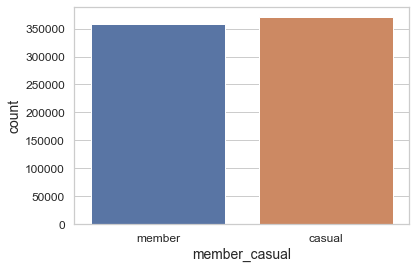

In [5]:
sns.set_style("whitegrid")
sns.countplot(x="member_casual",data=df)

<b>3) Are there issues with bias or credibility in this data? Does your data ROCCC?</b>

By looking at the count plot above we can clearly conclude that the data which we are dealing with doesnt have any bias as the number of casual and member are almost equal. Being that said we can also say that the data is ROCCC(Reliable, original, Comprehensive, Current, Cited).

<b>4) How are you addressing licensing, privacy, security, and accessibility?</b>

We are only performing analysis on the data related to the bike, the time and location of the bike but, not the personal details about the rider. In this way we can assure the privacy and also this data is a public data but the personal information of the riders is still private so we can assure security aswell. 

<b>5) How did you verify the data’s integrity?</b>

we can actually verify the integrity through data validation.

<b>6) How does it help you answer your question?</b>

If we assure the data integrity then the final outcom of our analysis can be considered as a perfect analysis.

<AxesSubplot:>

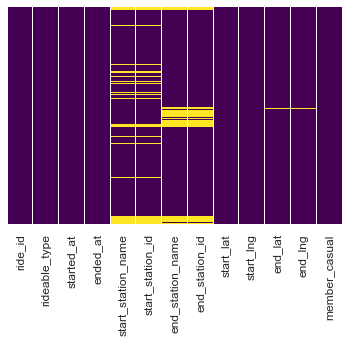

In [6]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap='viridis')

<b>7) Are there any problems with the data?</b>

As shown in the above heatmap there is a small problem with nulls as we can see there are a lot of nulls in station details. We can either find a way dealing with them or suimply droping them ight work until it doesn't create any bias. 

# <u>Process:</u>

Guiding questions
1. What tools are you choosing and why?
2. Have you ensured your data’s integrity?
3. What steps have you taken to ensure that your data is clean?
4. How can you verify that your data is clean and ready to analyze?
5. Have you documented your cleaning process so you can review and share those results?

<b>1) What tools are you choosing and why?</b>

We can refer to imported modules chunk to see which tools are actually used. The main tools are : 
     1.pandas for dataframes
     2.numpy for arrays
     3.matplotlib and seaborn for visualization

<b>2) Have you ensured your data’s integrity?</b>

To ensure the data integrity we already performed EDA and also we will be continue doing that throughout this analysis.

In [7]:
df["time_diff"] = df['ended_at'] - df['started_at']

df["time_diff"] = df["time_diff"]/np.timedelta64(1,'m') #Convert to minutes

df["weekday"] = df["started_at"].dt.weekday #Return the day of the week as an integer, where Monday is 0 and Sunday is 6

In [8]:
df.to_csv("bike.csv", index=False)

#### Group By Funtion

In [9]:
# This function counts the number of riders starting from a particular station
df.groupby("start_station_name")["ride_id"].count().sort_values()

start_station_name
Lyft Driver Center Private Rack        1
Marshfield Ave & 59th St               3
Rhodes Ave & 71st St                   3
Racine Ave & 61st St                   3
State St & 76th St                     3
                                   ...  
Millennium Park                     6176
Lake Shore Dr & Monroe St           6935
Michigan Ave & Oak St               7245
Lake Shore Dr & North Blvd          8735
Streeter Dr & Grand Ave            14072
Name: ride_id, Length: 689, dtype: int64

In [10]:
# This function counts the number of rider's endpoint
df.groupby("end_station_name")["ride_id"].count().sort_values()

end_station_name
Lyft Driver Center Private Rack        1
S Aberdeen St & W 106th St             2
N Clark St & W Elm St                  2
Torrence Ave & 106th St                2
Torrence Ave & 126th Pl                2
                                   ...  
Wells St & Concord Ln               6260
Lake Shore Dr & Monroe St           6628
Michigan Ave & Oak St               7222
Lake Shore Dr & North Blvd         10532
Streeter Dr & Grand Ave            14036
Name: ride_id, Length: 690, dtype: int64

In [11]:
# This function counts and at the same time groups by rideable type w.r.t the rider id
df.groupby("rideable_type")["ride_id"].count().sort_values()

rideable_type
docked_bike       51716
electric_bike    242859
classic_bike     435020
Name: ride_id, dtype: int64

In [12]:
# This function counts and at the same time groups by member_casual w.r.t the rider id
df.groupby("member_casual")["ride_id"].count().sort_values()

member_casual
member    358914
casual    370681
Name: ride_id, dtype: int64

In [13]:
# this function calculates the mean of time different, sorts the values and groups by starting station name
df.groupby("start_station_name")["time_diff"].mean().sort_values()

start_station_name
WEST CHI-WATSON                                       0.15
Lyft Driver Center Private Rack                       7.75
Damen Ave & 51st St                                  10.56
Woodlawn & 103rd - Olive Harvey Vaccination Site     11.13
Larrabee St & Kingsbury St                           13.08
                                                     ...  
State St & 95th St                                  621.33
Indiana Ave & 103rd St                              943.09
Wabash Ave & 83rd St                               2177.13
Central Ave & Harrison St                          2283.77
Throop St & 52nd St                                3030.07
Name: time_diff, Length: 689, dtype: float64

In [14]:
# this function calculates the mean of time different, sorts the values and groups by rideable type name
df.groupby("rideable_type")["time_diff"].mean().sort_values()

rideable_type
electric_bike   18.03
classic_bike    21.87
docked_bike     99.29
Name: time_diff, dtype: float64

In [15]:
# this function calculates the mean of time different, sorts the values and groups by member_casual name
df.groupby("member_casual")["time_diff"].mean().sort_values()

member_casual
member   14.68
casual   37.12
Name: time_diff, dtype: float64

### <u>III) Documentation of cleaning or manipulation of data</u>

### Pandas-Profiling Reports

In [33]:
profile = ProfileReport(df=df, title='Bike Report', minimal=True)

In [34]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
profile.to_file("bike_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

This profiling was done so that we have a complete detaisls about the data which is also called as metadata

### Dropping unwanted features

In [16]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'time_diff', 'weekday'], dtype='object')

In [17]:
df.drop(['ride_id','start_station_id','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'],axis=1,inplace=True)

In [18]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,time_diff,weekday
0,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,member,2.72,6
1,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,member,6.28,4
2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,member,5.98,4
3,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,member,25.83,3
4,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,member,4.13,4


### Treating missing values

In [19]:
df.isnull().sum() #shows the number of nulls present in each column

rideable_type             0
started_at                0
ended_at                  0
start_station_name    80093
end_station_name      86387
member_casual             0
time_diff                 0
weekday                   0
dtype: int64

<AxesSubplot:>

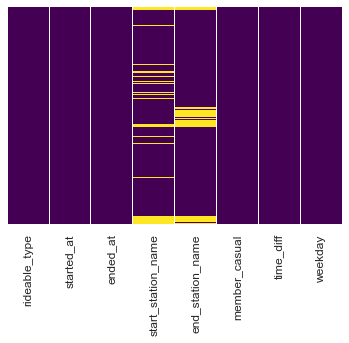

In [20]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap='viridis')

In [21]:
df['start_station_name'] = df['start_station_name'].replace(np.nan,"Missing")
df['end_station_name'] = df['end_station_name'].replace(np.nan,"Missing")

<AxesSubplot:>

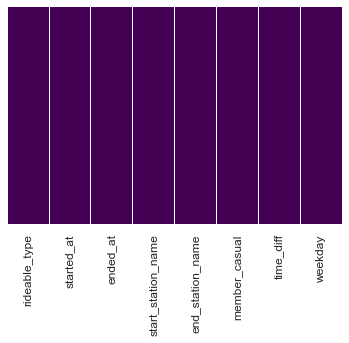

In [22]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap='viridis')

In [23]:
df.isnull().sum() #shows the number of nulls present in each column

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
time_diff             0
weekday               0
dtype: int64

In [24]:
df.describe()

,time_diff,weekday
count,729595.00,729595.00
mean,26.08,3.16
std,268.33,1.98
min,-5.10,0.00
25%,7.65,1.00
50%,13.53,3.00
75%,24.22,5.00
max,55944.15,6.00


<b>3) What steps have you taken to ensure that your data is clean?</b>

The first step was dropping all the unwanted features and then replacing NANs with "Missing". I haven't dropped the NANs because it may effect the data integrity.

<b>4) How can you verify that your data is clean and ready to analyze?</b>

Since the data cleaning was done our data is ready for analysis. The data is also an unbiased data which means this is a complete data

<b>5) Have you documented your cleaning process so you can review and share those results?</b>

I have used Pandas-Profiling to make a report on the features, also few visuals and output under every code chunk.

# <u>Analyze</u>

### IV) A summary of your analysis

Guiding questions
1. How should you organize your data to perform analysis on it?
2. Has your data been properly formatted?
3. What surprises did you discover in the data?
4. What trends or relationships did you find in the data?
5. How will these insights help answer your business questions?

1) How should you organize your data to perform analysis on it?

The data should be clean and should only contain the fields which are required for analysis.

2) Has your data been properly formatted?

Yes! My data was formatted properly.

#### Univariate Data Exploration:

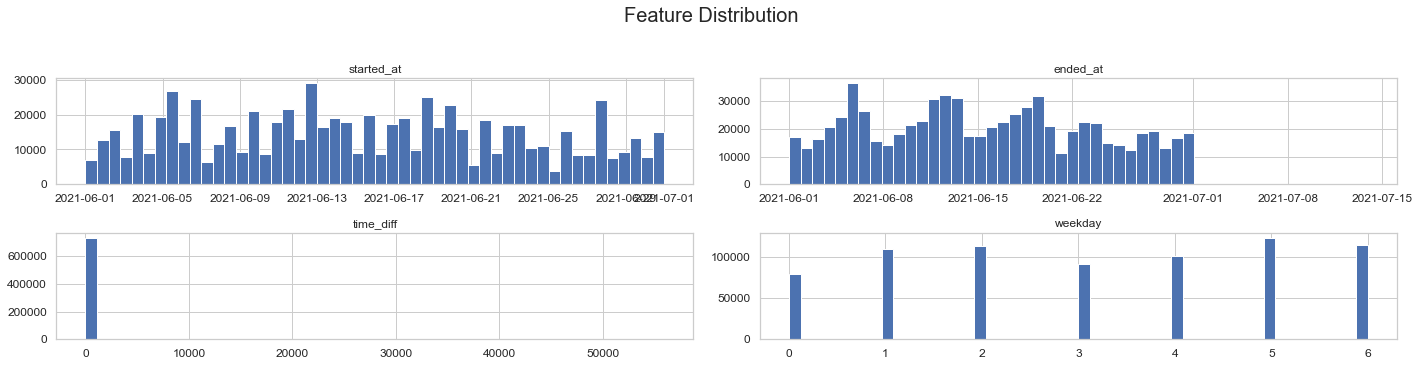

In [25]:
df.hist(bins=50, figsize=(20,5))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

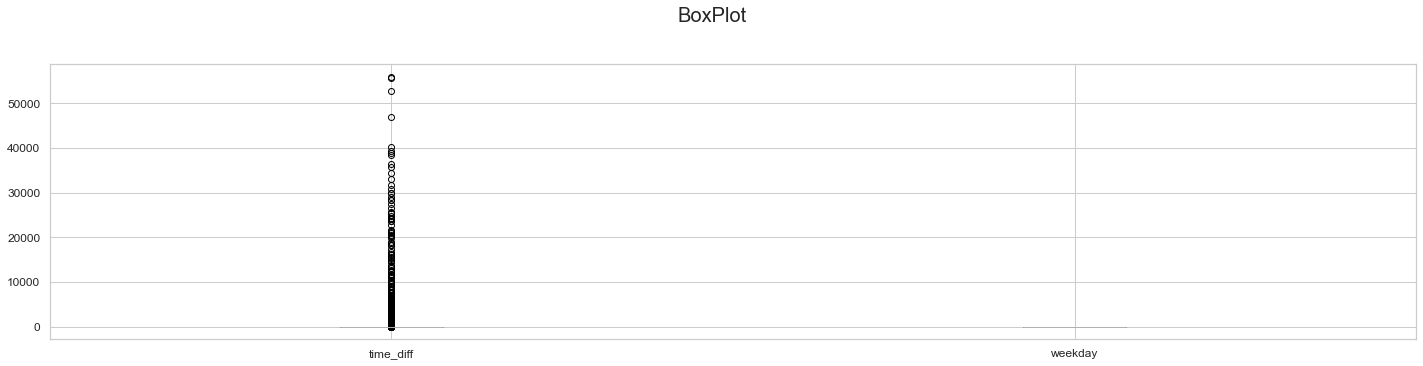

In [26]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

<Figure size 1440x2160 with 0 Axes>

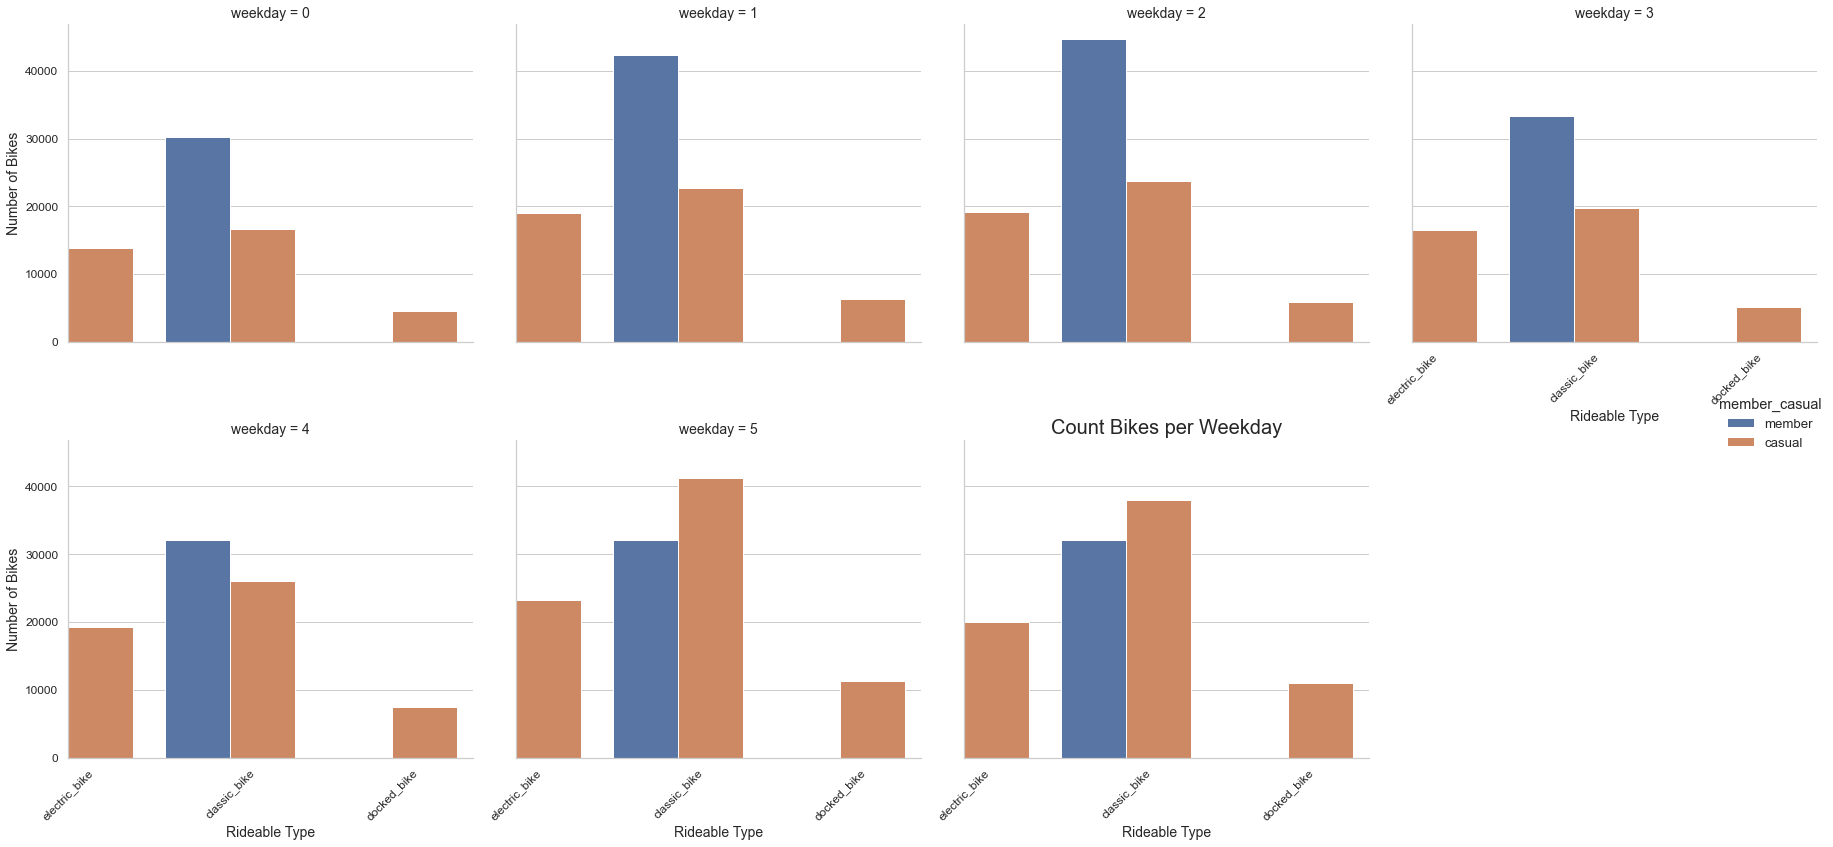

In [36]:
plt.figure(figsize=(20,30))


g = sns.catplot(x='rideable_type', hue='member_casual', col = 'weekday', col_wrap=4,
            kind='count', data=df,
            height = 6, aspect = 1)

g.set_xlabels("Rideable Type")
g.set_ylabels("Number of Bikes")
plt.title("Count Bikes per Weekday", size=20)
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

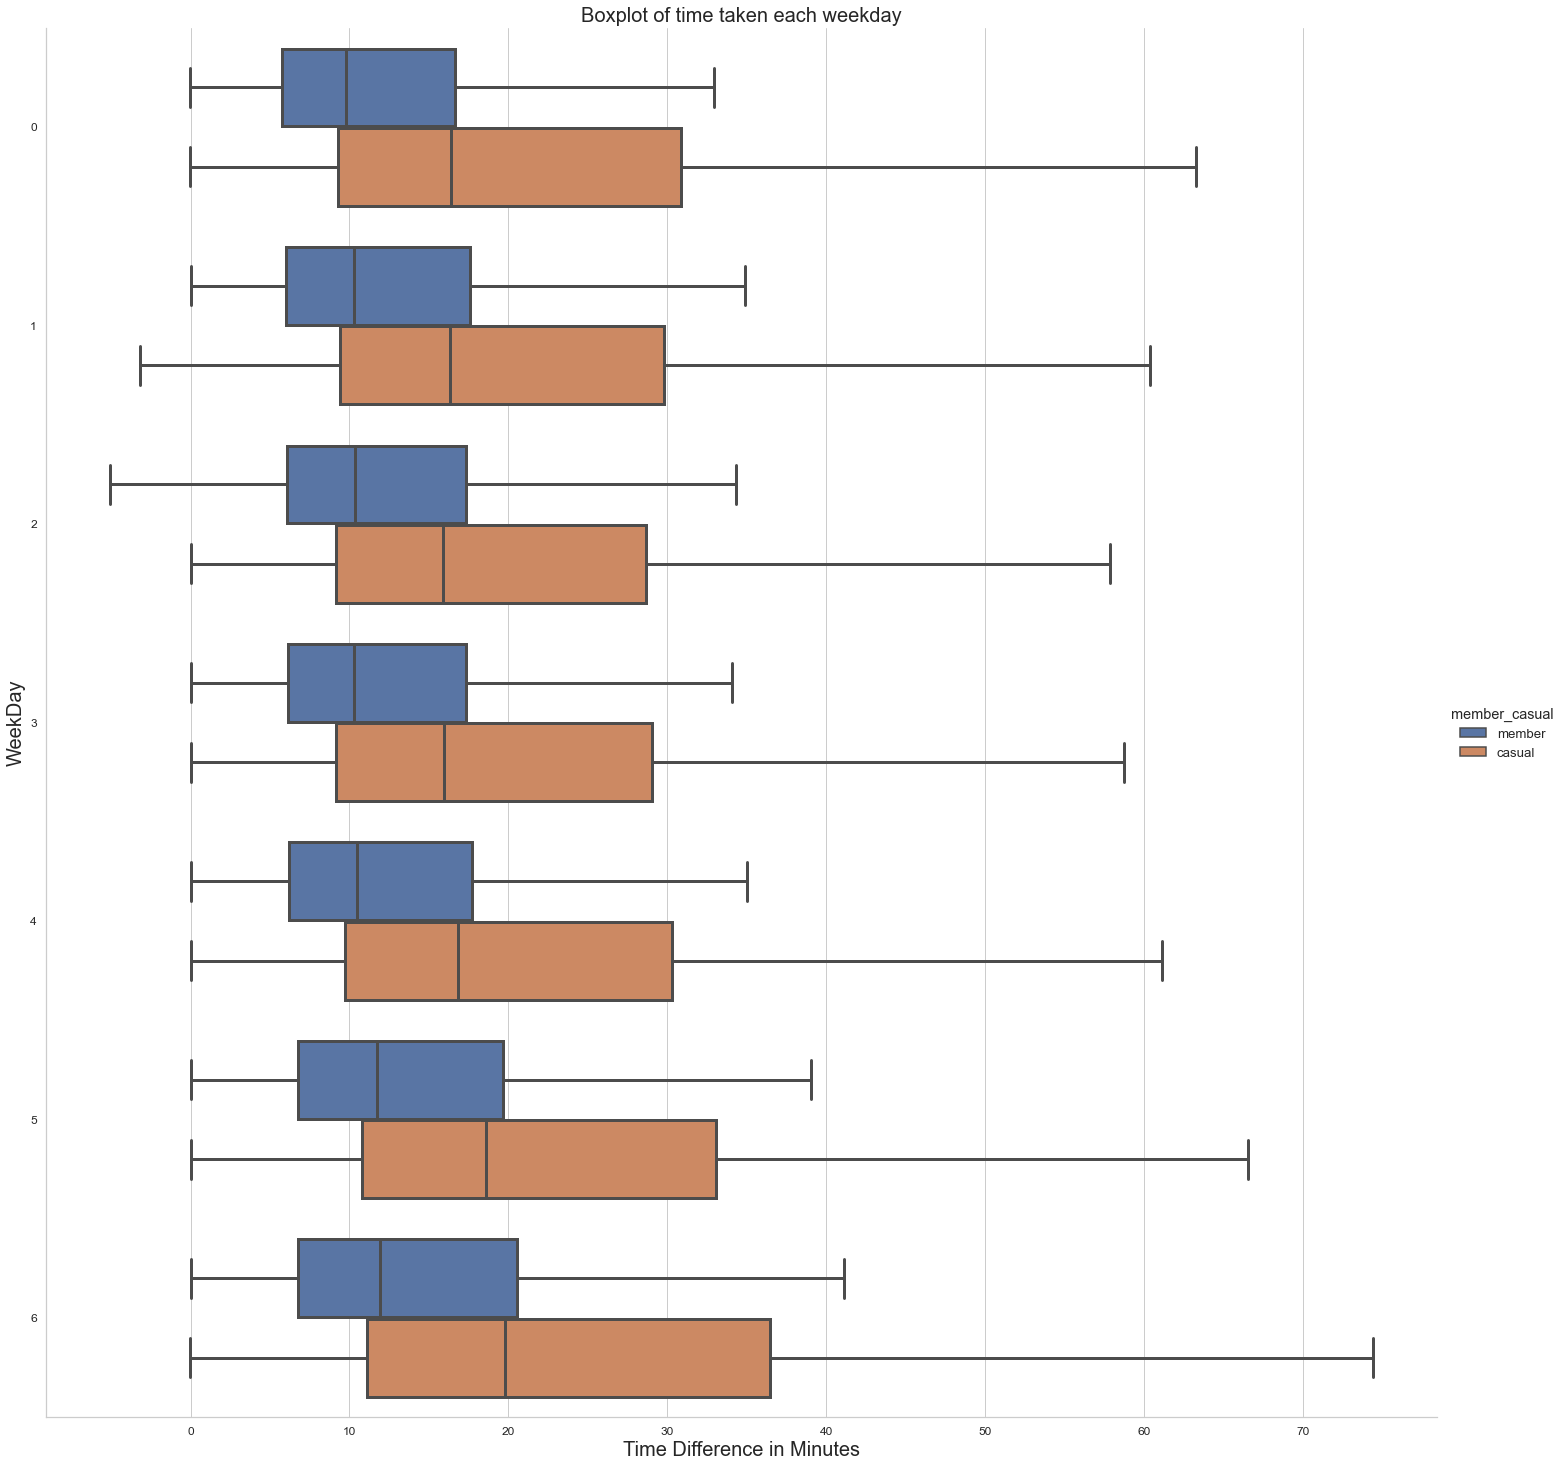

In [28]:
plt.figure(figsize=(20,20))

sns.catplot(x="time_diff", y="weekday",

                hue="member_casual", ci=None,

                data=df, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("Time Difference in Minutes", size=20)
plt.ylabel("WeekDay", size=20)

plt.title("Boxplot of time taken each weekday", size=20)

plt.show()

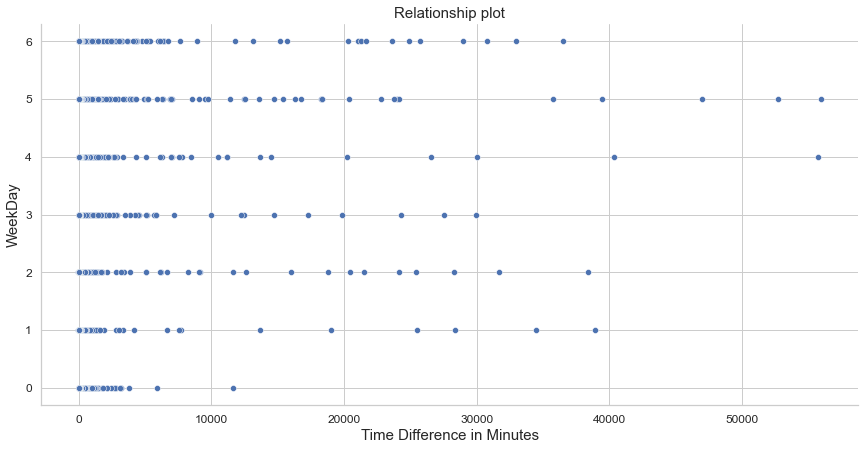

In [29]:
sns.relplot(x="time_diff", y="weekday", data=df, height = 6, aspect = 2)

plt.xlabel("Time Difference in Minutes", size=15)
plt.ylabel("WeekDay", size=15)
plt.title("Relationship plot", size=15)
plt.show()

#### Time Series Analysis:

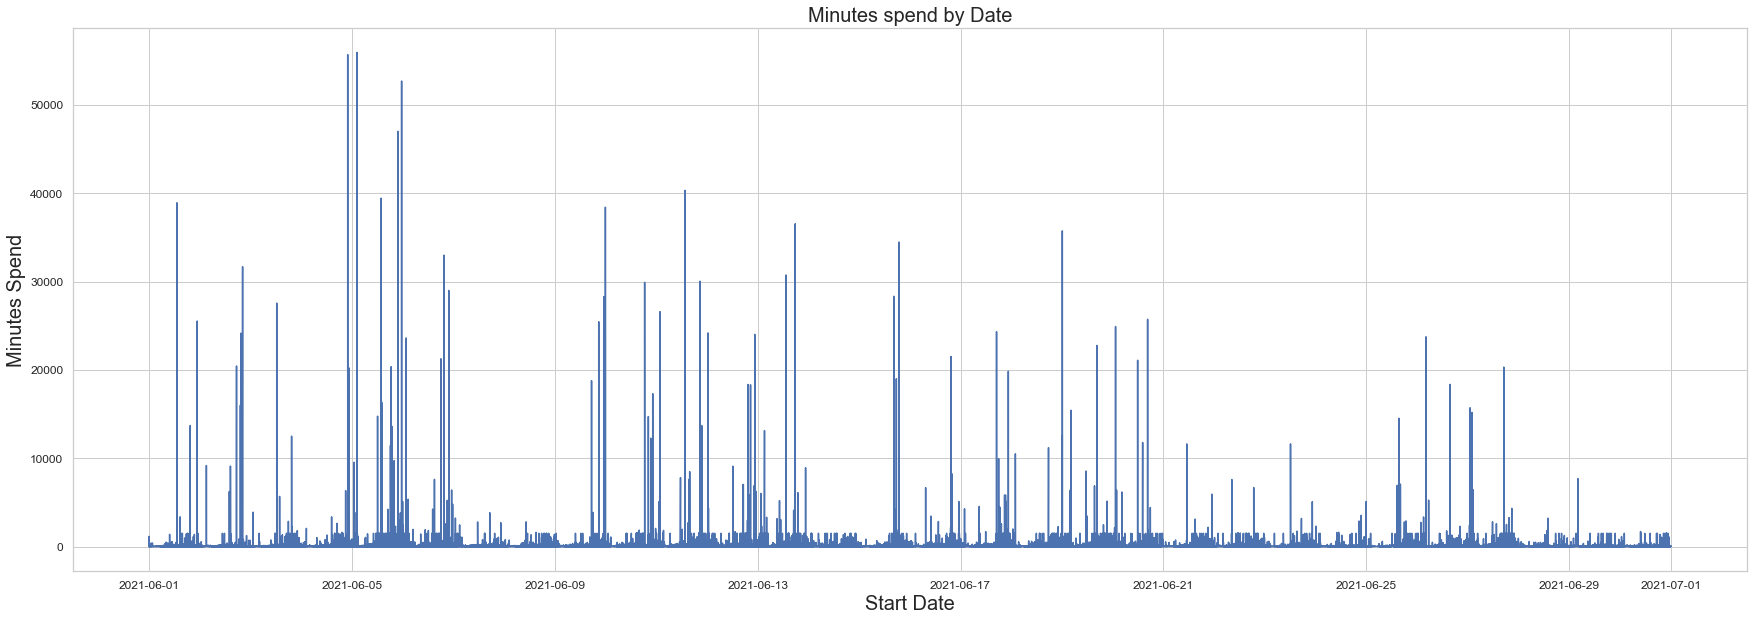

In [30]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.time_diff,data=df, estimator=None)
plt.title("Minutes spend by Date", fontsize=20)
plt.xlabel("Start Date", fontsize=20)
plt.ylabel("Minutes Spend", fontsize=20)
plt.show()

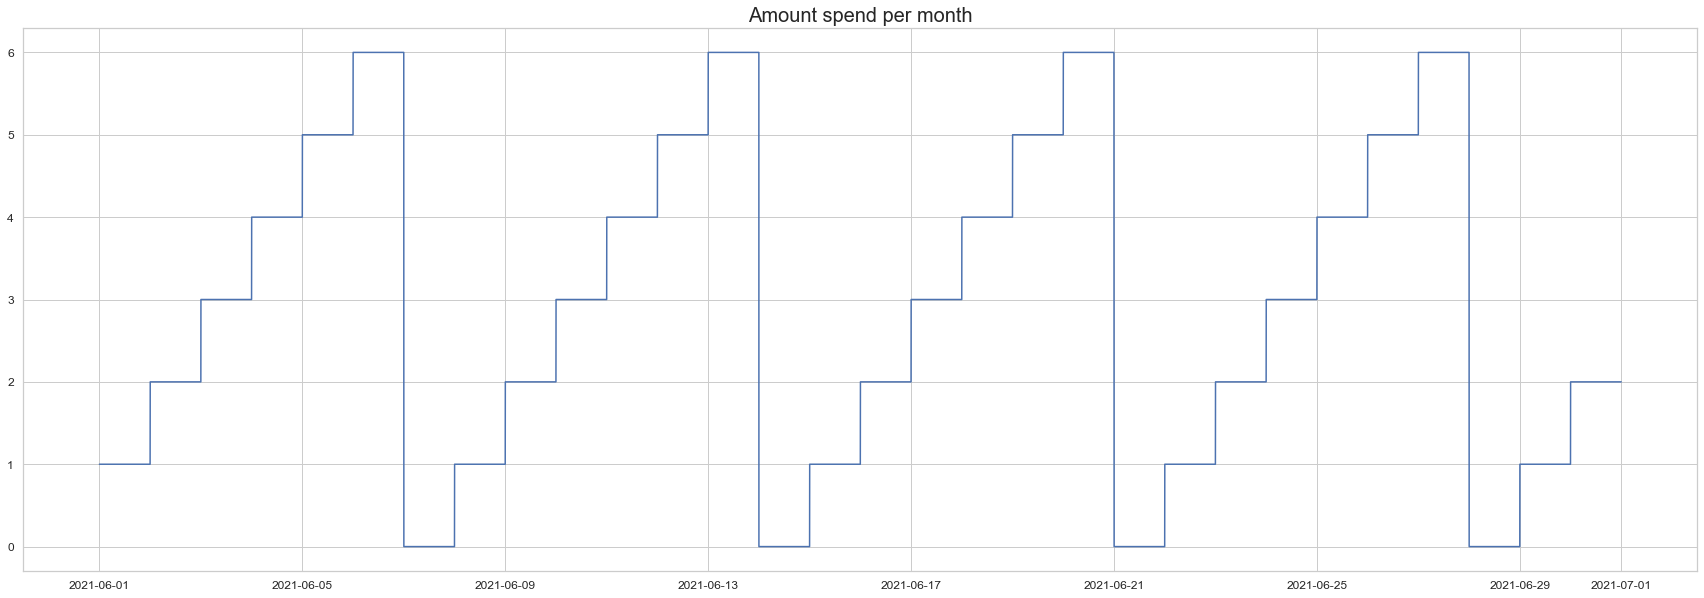

In [31]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.weekday, data=df, estimator=None)
plt.title("Amount spend per month", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.show()

#### Pairplots:

<Figure size 1440x1440 with 0 Axes>

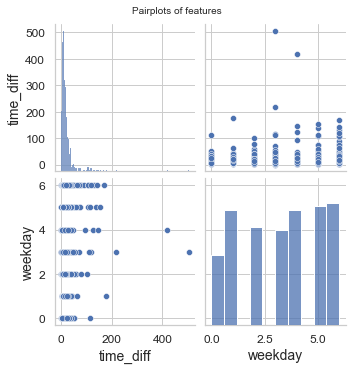

In [32]:
plt.figure(figsize=(20,20))
sns.pairplot(df.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=10)
plt.show()

#### Correlation

In [33]:
df.corr()

,time_diff,weekday
time_diff,1.00,0.01
weekday,0.01,1.00


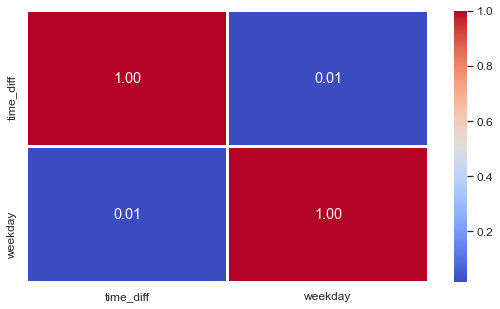

In [34]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

3) What surprises did you discover in the data?

Suprisingly, Casual riders spend most time on bikes.Classic bikes are the bikes which most of the riders prefer. Docked bike is less prefered bike and only prefered by casual riders. Streeter Dr & Grand Ave are the most popular places and Lyft Driver Center Private Rack is less popular. 

4) What trends or relationships did you find in the data?

Monday records the lowest in terms of bicycles taken for a ride and time spent on the riding. Also riders, mainly members only opt to classic bikes. Also The minutes spent on the ride though intially increased, it was later got decreased. Fridays and saturdays are the days where most of the riders spend time on bicycles. Member riders love classic and electric bikes but casual riders prefer docked bikes. Member riders have been in consistent usage for all days, same for casual riders. Majority of time spent riding whole one week is less than 5000 minutes or 83 hours

5) How will these insights help answer your business questions?

These insights helps us to see the time spent and the type of bicycles prefered by riders. This actually helps us to come up with ways where we can convert casual riders into members as they spend most of the time on riding.

# <u>Share</u>

### V) Supporting visualizations and key findings

Guiding questions
1. Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?
2. What story does your data tell?
3. How do your findings relate to your original question?
4. Who is your audience? What is the best way to communicate with them?
5. Can data visualization help you share your findings?
6. Is your presentation accessible to your audience?

1. Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?

Yes.

2. What story does your data tell?

My data gives a clear idea about annual and casual riders and the types of bikes they were intrested in. Also, it gives other important information like the average time spent by both the catoguries.

3. How do your findings relate to your original question?

The visaualisations and analysis clearly answeres the question also coverd other aspects of the problem.

4. Who is your audience? What is the best way to communicate with them?

In this case its un doubtadly the bicycle company's director of marketing.

5. Can data visualization help you share your findings?

Yes!

6. Is your presentation accessible to your audience?

Yes!

# <u>Act</u>

### VI) Your top three recommendations based on your analysis

Guiding questions
1. What is your final conclusion based on your analysis?
2. How could your team and business apply your insights?
3. What next steps would you or your stakeholders take based on your findings?
4. Is there additional data you could use to expand on your findings?

1. What is your final conclusion based on your analysis?

My final conclusion after the analysis would be that casual riders are often attracted or the might have felt confortable in using the classing bicycle model where as the annual members are also trying out the other varients of the bicycles. Its clear that adding some more features like discounts w.r.t the classic bicycle might help us in attracting the casual riders to opt for an annual mambership

2. How could your team and business apply your insights?

Through my analysis the business which hold the bicycle company will have an idea that classic varients are demanded the most and they will make sure they will be available all the time. It is also easy to say that there are few popula regions and unpopular regions where it helps them to maintain the business well. 

3. What next steps would you or your stakeholders take based on your findings?

The next step will be that the casual ride cost will be decreased for those who opts for annual membership. And making the bicycle service availablt in the famaous regions.

4. Is there additional data you could use to expand on your findings?

Ofcourse! There are regions where this buisiness is not that popular. If we have a detailed data anout those regions it will be easy to find the reason for that and Also Data about bicycles and the cost of bicycles so that we can find why casual riders are only going for classic varient.